# Create a Sankey Diagram

Sankey diagrams are flow diagrams where the width of the links or arrows is proportional to flow volume. For example, Sankey diagrams are commonly used to break down a budget, energy usage, or website traffic. They are useful for comparing contributions to a flow and identifying major and minor flow sources. Sometimes a picture is worth a thousand words, so scroll down to see an example Sankey diagram! This template uses Plotly to create an interactive and customizable Sankey diagram. 
 
To use your data in this template, the following criteria must be satisfied:
- At least two categorical columns to break down the flow. Every unique value in these columns will become a node in the diagram. 
- A numerical column to set the width of the links between nodes (in other words: flow volume). Rows with negative or null values will be ignored.

The placeholder data in this template consists of aggregated order data from an online store, with the total sales coming from a specific region, customer segment, and product category.

In [4]:
# Load packages
import pandas as pd
import numpy as np
import plotly
import plotly.graph_objects as go
import plotly.express as px
import matplotlib.colors

# Upload your data as CSV to load as a DataFrame
df = pd.read_csv("data/order_summary.csv")
df

,Region,Segment,Category,Sub-Category,Sales
0,Central,Consumer,Furniture,Bookcases,12960.854
1,Central,Consumer,Furniture,Chairs,42933.375
2,Central,Consumer,Furniture,Furnishings,9499.990
3,Central,Consumer,Furniture,Tables,20835.000
4,Central,Consumer,Office Supplies,Appliances,9818.721
...,...,...,...,...,...
198,West,Home Office,Office Supplies,Supplies,455.974
199,West,Home Office,Technology,Accessories,7511.930
200,West,Home Office,Technology,Copiers,11219.788
201,West,Home Office,Technology,Machines,11241.208


If you have swapped your own data, review your data above to decide which categorical columns should break down the flow and in which order. You'll also have to fill out the first four steps listed in the following code cell. The rest of the code will create the Sankey diagram based on your specification!

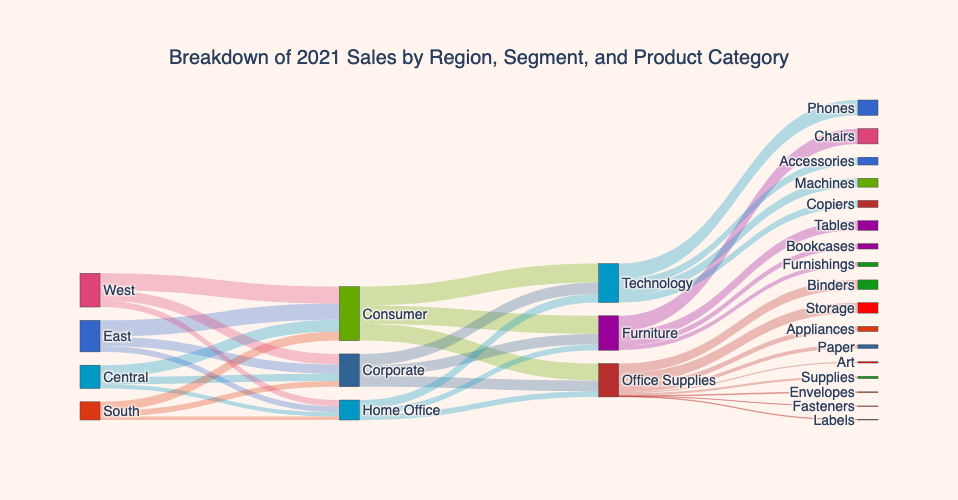

In [3]:
# -----------------------------------------#
# Fill out steps 1-4 to spec your diagram: #
# -----------------------------------------#

# Step 1. Specify >=2 categorical columns in flow order
cols = ["Region", "Segment", "Category", "Sub-Category"]

# Step 2. Specify a column for the flow volume value
value = "Sales"
value_suffix = " USD"  # Specify (if any) a suffix for the value

# Step 3. Set the plot's title
title = "Breakdown of 2021 Sales by Region, Segment, and Product Category"

# Step 4. (Optional) Customize layout, font, and colors
width, height = 700, 500  # Set plot's width and height
fontsize = 14  # Set font size of labels
fontfamily = "Helvetica"  # Set font family of plot's text
bgcolor = "SeaShell"  # Set the plot's background color (use color name or hex code)
link_opacity = 0.3  # Set a value from 0 to 1: the lower, the more transparent the links
node_colors = px.colors.qualitative.G10  # Define a list of hex color codes for nodes

# ---------------------------------------#
# Code to create Sankey diagram begins!  #
# ---------------------------------------#

s = []  # This will hold the source nodes
t = []  # This will hold the target nodes
v = []  # This will hold the flow volumes between the source and target nodes
labels = np.unique(df[cols].values)  # Collect all the node labels

# Get all the links between two nodes in the data and their corresponding values
for c in range(len(cols) - 1):
    s.extend(df[cols[c]].tolist())
    t.extend(df[cols[c + 1]].tolist())
    v.extend(df[value].tolist())
links = pd.DataFrame({"source": s, "target": t, "value": v})  
links = links.groupby(["source", "target"], as_index=False).agg({"value": "sum"})

# Convert list of colors to RGB format to override default gray link colors
colors = [matplotlib.colors.to_rgb(i) for i in node_colors]  

# Create objects to hold node/label and link colors
label_colors, links["link_c"] = [], 0

# Loop through all the labels to specify color and to use label indices
c, max_colors = 0, len(colors)  # To loop through the colors array
for l in range(len(labels)):
    label_colors.append(colors[c])
    link_color = colors[c] + (link_opacity,)  # Make link more transparent than the node
    links.loc[links.source == labels[l], ["link_c"]] = "rgba" + str(link_color)
    links = links.replace({labels[l]: l})  # Replace node labels with the label's index
    if c == max_colors - 1:
        c = 0
    else:
        c += 1

# Convert colors into RGB string format for Plotly
label_colors = ["rgb" + str(i) for i in label_colors]

# Define a Plotly Sankey diagram
fig = go.Figure( 
    data=[
        go.Sankey(
            valuesuffix=value_suffix,
            node=dict(label=labels, color=label_colors),
            link=dict(
                source=links["source"],
                target=links["target"],
                value=links["value"],
                color=links["link_c"],
            ),
        )
    ]
)

# Customize plot based on earlier values
fig.update_layout(
    title_text=title,
    font_size=fontsize,
    font_family=fontfamily,
    width=width,
    height=height,
    paper_bgcolor=bgcolor,
    title={"y": 0.9, "x": 0.5, "xanchor": "center", "yanchor": "top"},  # Centers title
)

fig.show()

This plot is interactive - try moving around the nodes! You can also download it as a png using the camera icon in the top right corner. You can always experiment with a different flow order by changing the order of columns in `cols`. Not satisfied with the plot's colors? Revisit Step 4 in the preceding code cell. 